## **Logistic regression Assignment**

 1. What is Logistic Regression, and how does it differ from Linear Regression ?
 -> Logistic Regression is a statistical model used for binary classification (predicting one of two outcomes). Unlike Linear Regression, which predicts a continuous numerical value, Logistic Regression predicts the probability of an instance belonging to a particular class.
2. What is the mathematical equation of Logistic Regression ?
-> P(y=1∣x)= 1/(1+e−(b0+b1x1+b2x2+...+bnxn))
where P(y=1∣x) is the probability of the output y being 1 given the input features x, b0 is the intercept, and b1,b 2,...,bn are the coefficients for the features x1,x 2,...,xn.
3. Why do we use the Sigmoid function in Logistic Regression ?
-> The sigmoid function (the S-shaped curve in the equation above) squashes the linear combination of features into a probability value between 0 and 1. This makes the output interpretable as the likelihood of belonging to a specific class.
4. What is the cost function of Logistic Regression ?
-> The cost function for Logistic Regression is typically the cross-entropy loss (also known as log loss). It measures the difference between the predicted probabilities and the actual class labels.
5. What is Regularization in Logistic Regression? Why is it needed ?
-> Regularization adds a penalty term to the cost function to prevent overfitting. Overfitting occurs when the model learns the training data too well, including noise, and performs poorly on unseen data.
6. Explain the difference between Lasso, Ridge, and Elastic Net regression ?
-> Lasso (L1 regularization): Adds the absolute value of the coefficients to the cost function. It can drive some coefficients to exactly zero, effectively performing feature selection.
Ridge (L2 regularization): Adds the squared value of the coefficients to the cost function. It shrinks the coefficients towards zero but rarely makes them exactly zero.

Elastic Net: A hybrid of Lasso and Ridge, it adds a linear combination of both L1 and L2 penalties.
7. When should we use Elastic Net instead of Lasso or Ridge?
-> Elastic Net is useful when you have a large number of features, and some of them are correlated. It can perform feature selection like Lasso while also benefiting from the stability of Ridge in the presence of correlated features
8. What is the impact of the regularization parameter (λ) in Logistic Regression?
-> The regularization parameter (lambda, λ) controls the strength of the penalty.
A larger λ increases the penalty, leading to smaller coefficients and a simpler model that is less prone to overfitting.
A smaller λ reduces the penalty, allowing the model to fit the training data more closely, potentially leading to overfitting.
9. What are the key assumptions of Logistic Regression?
-> Key assumptions include:
Linearity of the log-odds: The relationship between the features and the log-odds of the outcome is linear.
Independence of observations: The data points are independent of each other.
No multicollinearity: The predictor variables are not highly correlated with each other.
Sufficiently large dataset: Logistic Regression performs best with a reasonable amount of data.
10. What are some alternatives to Logistic Regression for classification tasks ?
-> Alternatives include:
Support Vector Machines (SVMs)
Decision Trees and Random Forests
Gradient Boosting algorithms (e.g., XGBoost, LightGBM)
Naive Bayes
K-Nearest Neighbors (KNN)
Neural Networks
11. What are Classification Evaluation Metrics?
-> Classification evaluation metrics assess the performance of a classification model. Common metrics include:
Accuracy
Precision
Recall (Sensitivity)
F1-score
Area Under the ROC Curve (AUC)
Confusion Matrix
12. How does class imbalance affect Logistic Regression?
-> Class imbalance (when one class has significantly more instances than the other) can bias the Logistic Regression model towards the majority class. It might achieve high accuracy but perform poorly on the minority class. Techniques like oversampling, undersampling, or using different cost functions can help mitigate this.
13. What is Hyperparameter Tuning in Logistic Regression?
-> Hyperparameter tuning involves finding the optimal values for the model's hyperparameters (e.g., the regularization parameter λ, the solver) that lead to the best performance on unseen data. Techniques like Grid Search, Random Search, and Bayesian Optimization are used for this.
14. What are different solvers in Logistic Regression? Which one should be used?
-> Solvers are algorithms used to optimize the cost function. Common solvers include:
liblinear: Suitable for small datasets.
lbfgs, newton-cg, sag, saga: Suitable for larger datasets. saga is often preferred for large datasets with L1 penalty. The best solver depends on the dataset size, the type of penalty used, and the computational resources.
15. How is Logistic Regression extended for multiclass classification ?
-> Logistic Regression can be extended to multiclass classification using two main approaches:
One-vs-Rest (OvR) or One-vs-All (OvA): Train a separate binary logistic regression model for each class, where one class is treated as the positive class and all other classes as the negative class.
Softmax Regression (Multinomial Logistic Regression): Generalizes the sigmoid function to handle multiple classes directly, outputting the probability distribution over all classes.
16. What are the advantages and disadvantages of Logistic Regression ?
-> Advantages:
Easy to implement and interpret.
Provides probability estimates.
Computationally efficient.
Works well for linearly separable data.

Disadvantages:
Assumes a linear relationship between features and log-odds.
Can struggle with complex, non-linear relationships.
Sensitive to multicollinearity.
17. What are some use cases of Logistic Regression ?
-> Use cases include:
Spam detection
Medical diagnosis (e.g., predicting the presence of a disease)
Credit risk assessment
Customer churn prediction
Image classification (binary)
Natural language processing (e.g., sentiment analysis)
18. What is the difference between Softmax Regression and Logistic Regression ?
-> Logistic Regression is for binary classification (two classes), while Softmax Regression is its extension for multiclass classification (more than two classes). Softmax outputs a probability distribution over all the classes, ensuring that the probabilities sum up to 1.
19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification ?
-> Softmax is generally preferred when the classes are mutually exclusive (an instance belongs to only one class).
OvR can be useful when the classes are not mutually exclusive (an instance can belong to multiple classes), although it might lead to issues with inconsistent probability estimates. Softmax is often more efficient and statistically well-founded for mutually exclusive classes.
20. How do we interpret coefficients in Logistic Regression?
-> The coefficients in Logistic Regression represent the change in the log-odds of the outcome for a one-unit increase in the predictor variable, holding other variables constant. To interpret the impact on the probability, we often exponentiate the coefficients. exp(bi) represents the odds ratio associated with a one-unit increase in the i-th predictor. An odds ratio greater than 1 suggests an increased probability of the outcome, while an odds ratio less than 1 suggests a decreased probability.

Practicals

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy

In [5]:
from sklearn.datasets import load_iris
data=load_iris()
X = data.data
y = data.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [7]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
y_pred
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9667


2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracy

In [8]:
from sklearn.linear_model import Lasso
lasso_regression_model = Lasso(alpha = 0.5)
lasso_regression_model

Lasso(alpha=0.5)

In [9]:
lasso_regression_model.fit(X_train, y_train)

Lasso(alpha=0.5)

In [11]:
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear')
logreg_lasso.fit(X_train, y_train)
y_pred_lasso = logreg_lasso.predict(X_test)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
print(f"Model Accuracy with L1 Regularization: {accuracy_lasso:.4f}")

Model Accuracy with L1 Regularization: 0.9333


3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficients

In [12]:
logreg_ridge = LogisticRegression(penalty='l2')
logreg_ridge.fit(X_train, y_train)

y_pred_ridge = logreg_ridge.predict(X_test)

accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
print(f"Model Accuracy with L2 Regularization: {accuracy_ridge:.4f}")


print("\nCoefficients with L2 Regularization:")
print(logreg_ridge.coef_)
print("\nIntercept with L2 Regularization:")
logreg_ridge.intercept_

Model Accuracy with L2 Regularization: 0.9667

Coefficients with L2 Regularization:
[[-0.43171259  0.82344651 -2.35119244 -0.96938012]
 [ 0.61818491 -0.42815386 -0.20595953 -0.82952283]
 [-0.18647232 -0.39529265  2.55715197  1.79890295]]

Intercept with L2 Regularization:


array([  9.49111756,   1.6376074 , -11.12872496])

4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')

In [13]:
logreg_elasticnet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)

logreg_elasticnet.fit(X_train, y_train)

y_pred_elasticnet = logreg_elasticnet.predict(X_test)

accuracy_elasticnet = accuracy_score(y_test, y_pred_elasticnet)
print(f"Model Accuracy with Elastic Net Regularization: {accuracy_elasticnet:.4f}")


Model Accuracy with Elastic Net Regularization: 0.9667


5. Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'

In [14]:
logreg_ovr = LogisticRegression(multi_class='ovr')

logreg_ovr.fit(X_train, y_train)

y_pred_ovr = logreg_ovr.predict(X_test)

accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f"Model Accuracy with One-vs-Rest (OvR): {accuracy_ovr:.4f}")


Model Accuracy with One-vs-Rest (OvR): 0.8667


6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Model Accuracy with Tuned Hyperparameters: {accuracy_tuned:.4f}")


Best parameters: {'C': 10, 'penalty': 'l2'}
Model Accuracy with Tuned Hyperparameters: 0.9333


7.  Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy

In [17]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)
accuracies = []
for train_index, test_index in skf.split(X, y):
  X_train_fold, X_test_fold = X[train_index], X[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]

  logreg_fold = LogisticRegression(random_state=1)
  logreg_fold.fit(X_train_fold, y_train_fold)
  y_pred_fold = logreg_fold.predict(X_test_fold)
  accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
  accuracies.append(accuracy_fold)
average_accuracy = np.mean(accuracies)

print(f"\nAverage Accuracy with Stratified K-Fold Cross-Validation: {average_accuracy:.4f}")


Average Accuracy with Stratified K-Fold Cross-Validation: 0.9600


8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy.

In [18]:
data = {'feature1': np.random.rand(100),
        'feature2': np.random.rand(100),
        'target': np.random.randint(0, 2, 100)}
df = pd.DataFrame(data)
df.to_csv('dummy_dataset.csv', index=False)

try:
    df_csv = pd.read_csv('dummy_dataset.csv')
    print("Dataset loaded successfully from 'dummy_dataset.csv'")
except FileNotFoundError:
    print("Error: 'dummy_dataset.csv' not found. Please make sure the file exists.")
    exit()


X_csv = df_csv.drop('target', axis=1)
y_csv = df_csv['target']


X_train_csv, X_test_csv, y_train_csv, y_test_csv = train_test_split(X_csv, y_csv, test_size=0.20, random_state=1)

logreg_csv = LogisticRegression()
logreg_csv.fit(X_train_csv, y_train_csv)

y_pred_csv = logreg_csv.predict(X_test_csv)

accuracy_csv = accuracy_score(y_test_csv, y_pred_csv)
print(f"Model Accuracy on CSV dataset: {accuracy_csv:.4f}")

Dataset loaded successfully from 'dummy_dataset.csv'
Model Accuracy on CSV dataset: 0.5000


9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy.

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {'C': uniform(loc=0, scale=10),
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['liblinear', 'lbfgs', 'saga']}

param_dist_filtered = {
    'C': uniform(loc=0, scale=10),
    'penalty': ['l1', 'l2'],  # 'elasticnet' requires 'saga' or 'lbfgs'
    'solver': ['liblinear', 'lbfgs', 'saga']
}

param_dist_elasticnet = {
    'C': uniform(loc=0, scale=10),
    'penalty': ['elasticnet'],
    'solver': ['saga'],
    'l1_ratio': uniform(loc=0, scale=1)
}

param_dist_combined = [
    {'C': uniform(loc=0, scale=10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
    {'C': uniform(loc=0, scale=10), 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag']},
    {'C': uniform(loc=0, scale=10), 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'l1_ratio': uniform(loc=0, scale=1)}
]


random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist_combined, n_iter=100, cv=5, random_state=1, n_jobs=-1)

random_search.fit(X_train, y_train)

print("\nBest parameters from RandomizedSearchCV:", random_search.best_params_)

best_model_rand = random_search.best_estimator_
y_pred_rand = best_model_rand.predict(X_test)
accuracy_rand = accuracy_score(y_test, y_pred_rand)
print(f"Model Accuracy with RandomizedSearchCV: {accuracy_rand:.4f}")



Best parameters from RandomizedSearchCV: {'C': np.float64(4.11787878969053), 'penalty': 'l2', 'solver': 'lbfgs'}
Model Accuracy with RandomizedSearchCV: 0.9667


10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy

In [20]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

ovo_classifier = OneVsOneClassifier(LogisticRegression())

ovo_classifier.fit(X_train, y_train)

y_pred_ovo = ovo_classifier.predict(X_test)

accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"\nModel Accuracy with One-vs-One (OvO) Multiclass Logistic Regression: {accuracy_ovo:.4f}")


Model Accuracy with One-vs-One (OvO) Multiclass Logistic Regression: 0.9667


11.  Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification

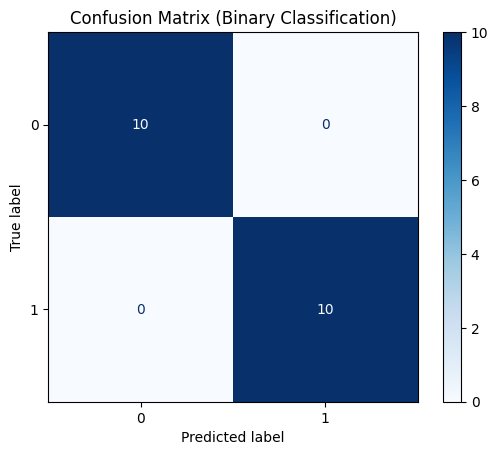

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.20, random_state=1, stratify=y_binary)

logreg_binary = LogisticRegression()
logreg_binary.fit(X_train_binary, y_train_binary)
y_pred_binary = logreg_binary.predict(X_test_binary)

cm = confusion_matrix(y_test_binary, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_binary.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Binary Classification)')
plt.show()

12.  Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='macro')

recall = recall_score(y_test, y_pred, average='macro')

f1 = f1_score(y_test, y_pred, average='macro')

print(f"\nModel Performance Metrics:")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1-Score (Macro): {f1:.4f}")


Model Performance Metrics:
Precision (Macro): 0.9524
Recall (Macro): 0.9744
F1-Score (Macro): 0.9610


13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance

In [23]:
from sklearn.datasets import make_classification

X_imb, y_imb = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                   n_redundant=2, n_clusters_per_class=1,
                                   weights=[0.95], flip_y=0.05, random_state=42)

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X_imb, y_imb, test_size=0.20, random_state=42, stratify=y_imb)

print(f"\nTraining set class distribution (imbalanced): {np.bincount(y_train_imb)}")
print(f"Testing set class distribution (imbalanced): {np.bincount(y_test_imb)}")

logreg_imb = LogisticRegression(random_state=42)
logreg_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = logreg_imb.predict(X_test_imb)

print("\nPerformance without class weights:")
print(f"Accuracy: {accuracy_score(y_test_imb, y_pred_imb):.4f}")
print(f"Precision (Minority Class): {precision_score(y_test_imb, y_pred_imb, pos_label=1):.4f}")
print(f"Recall (Minority Class): {recall_score(y_test_imb, y_pred_imb, pos_label=1):.4f}")
print(f"F1-Score (Minority Class): {f1_score(y_test_imb, y_pred_imb, pos_label=1):.4f}")

logreg_weighted = LogisticRegression(class_weight='balanced', random_state=42)
logreg_weighted.fit(X_train_imb, y_train_imb)
y_pred_weighted = logreg_weighted.predict(X_test_imb)

print("\nPerformance with class weights:")
print(f"Accuracy: {accuracy_score(y_test_imb, y_pred_weighted):.4f}")
print(f"Precision (Minority Class): {precision_score(y_test_imb, y_pred_weighted, pos_label=1):.4f}")
print(f"Recall (Minority Class): {recall_score(y_test_imb, y_pred_weighted, pos_label=1):.4f}")
print(f"F1-Score (Minority Class): {f1_score(y_test_imb, y_pred_weighted, pos_label=1):.4f}")


Training set class distribution (imbalanced): [746  54]
Testing set class distribution (imbalanced): [187  13]

Performance without class weights:
Accuracy: 0.9500
Precision (Minority Class): 0.7143
Recall (Minority Class): 0.3846
F1-Score (Minority Class): 0.5000

Performance with class weights:
Accuracy: 0.8750
Precision (Minority Class): 0.2273
Recall (Minority Class): 0.3846
F1-Score (Minority Class): 0.2857


14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance.

--2025-05-19 23:54:20--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-05-19 23:54:21 (4.15 MB/s) - ‘titanic.csv.1’ saved [60302/60302]


Logistic Regression Model Performance on Titanic Dataset:
Accuracy: 0.7989
Precision: 0.7619
Recall: 0.6957
F1-Score: 0.7273


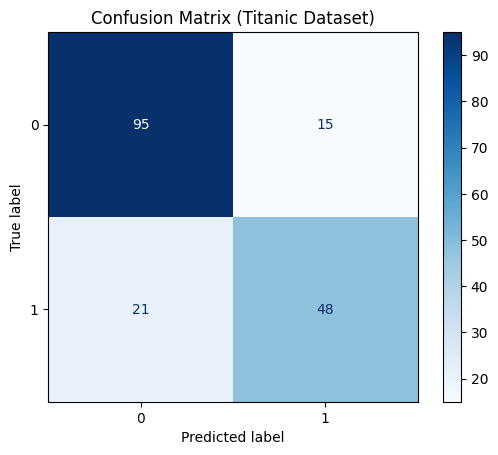

In [25]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

titanic_df = pd.read_csv('titanic.csv')

titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

titanic_df.drop('Cabin', axis=1, inplace=True)

titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

X = titanic_df[features]
y = titanic_df[target]

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

logreg_titanic = LogisticRegression(random_state=1)
logreg_titanic.fit(X_train_titanic, y_train_titanic)

y_pred_titanic = logreg_titanic.predict(X_test_titanic)

accuracy_titanic = accuracy_score(y_test_titanic, y_pred_titanic)
precision_titanic = precision_score(y_test_titanic, y_pred_titanic)
recall_titanic = recall_score(y_test_titanic, y_pred_titanic)
f1_titanic = f1_score(y_test_titanic, y_pred_titanic)
cm_titanic = confusion_matrix(y_test_titanic, y_pred_titanic)

print("\nLogistic Regression Model Performance on Titanic Dataset:")
print(f"Accuracy: {accuracy_titanic:.4f}")
print(f"Precision: {precision_titanic:.4f}")
print(f"Recall: {recall_titanic:.4f}")
print(f"F1-Score: {f1_titanic:.4f}")

disp_titanic = ConfusionMatrixDisplay(confusion_matrix=cm_titanic, display_labels=logreg_titanic.classes_)
disp_titanic.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Titanic Dataset)')
plt.show()

15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling

In [26]:
from sklearn.preprocessing import StandardScaler

logreg_no_scale = LogisticRegression(random_state=1)
logreg_no_scale.fit(X_train, y_train)
y_pred_no_scale = logreg_no_scale.predict(X_test)
accuracy_no_scale = accuracy_score(y_test, y_pred_no_scale)
print(f"\nModel Accuracy without Scaling: {accuracy_no_scale:.4f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression(random_state=1)
logreg_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = logreg_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Model Accuracy with Standardization: {accuracy_scaled:.4f}")


Model Accuracy without Scaling: 0.9667
Model Accuracy with Standardization: 0.9667


16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.


ROC-AUC Score: 0.8329


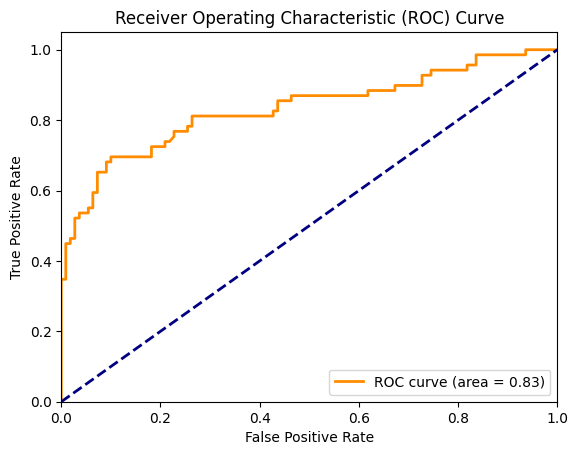

In [27]:
from sklearn.metrics import roc_curve, auc

X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.20, random_state=1, stratify=y_binary)

logreg_binary = LogisticRegression()
logreg_binary.fit(X_train_binary, y_train_binary)

y_prob = logreg_binary.predict_proba(X_test_binary)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

roc_auc = auc(fpr, tpr)

print(f"\nROC-AUC Score: {roc_auc:.4f}")

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy

In [28]:
logreg_custom_C = LogisticRegression(C=0.5, random_state=1)

logreg_custom_C.fit(X_train, y_train)

y_pred_custom_C = logreg_custom_C.predict(X_test)

accuracy_custom_C = accuracy_score(y_test, y_pred_custom_C)
print(f"\nModel Accuracy with C=0.5: {accuracy_custom_C:.4f}")



Model Accuracy with C=0.5: 0.9667


18.  Write a Python program to train Logistic Regression and identify important features based on model
coefficients

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

coefficients = logreg.coef_
feature_names = data.feature_names

print("\nFeature Coefficients:")
for i in range(coefficients.shape[0]):
  print(f"\nCoefficients for class {logreg.classes_[i]}:")
  for j in range(len(feature_names)):
    print(f"{feature_names[j]}: {coefficients[i, j]:.4f}")

if logreg.multi_class == 'ovr' or len(logreg.classes_) == 2:
  abs_coefficients = np.mean(np.abs(coefficients), axis=0)
  sorted_indices = np.argsort(abs_coefficients)[::-1]
  print("\nFeature Importance based on absolute coefficient values (averaged across classes for OvR):")
  for idx in sorted_indices:
    print(f"{feature_names[idx]}: {abs_coefficients[idx]:.4f}")




Feature Coefficients:

Coefficients for class 0:
sepal length (cm): -0.4317
sepal width (cm): 0.8234
petal length (cm): -2.3512
petal width (cm): -0.9694

Coefficients for class 1:
sepal length (cm): 0.6182
sepal width (cm): -0.4282
petal length (cm): -0.2060
petal width (cm): -0.8295

Coefficients for class 2:
sepal length (cm): -0.1865
sepal width (cm): -0.3953
petal length (cm): 2.5572
petal width (cm): 1.7989


19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score

In [30]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print(f"\nCohen's Kappa Score: {kappa:.4f}")



Cohen's Kappa Score: 0.9484


20.  Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classification


Average Precision Score: 0.8274


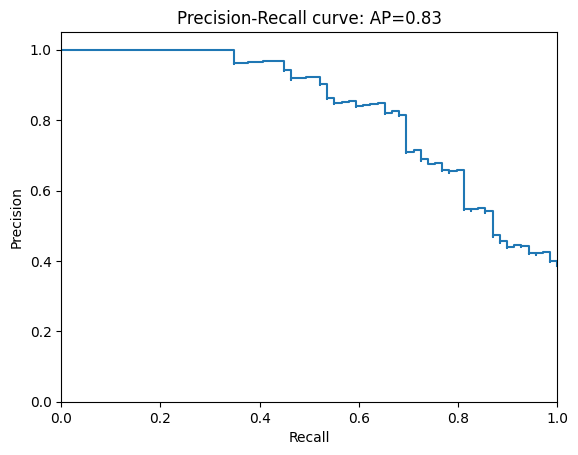

In [31]:
from sklearn.metrics import precision_recall_curve, average_precision_score

X_binary = X[(y == 0) | (y == 1)]
y_binary = y[(y == 0) | (y == 1)]

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.20, random_state=1, stratify=y_binary)

logreg_binary = LogisticRegression()
logreg_binary.fit(X_train_binary, y_train_binary)

y_scores = logreg_binary.decision_function(X_test_binary)

precision, recall, _ = precision_recall_curve(y_test_binary, y_scores)

average_precision = average_precision_score(y_test_binary, y_scores)

print(f"\nAverage Precision Score: {average_precision:.4f}")

plt.figure()
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy.

In [32]:
solvers = ['liblinear', 'saga', 'lbfgs']
accuracy_scores = {}

for solver in solvers:
  if solver == 'saga':

    logreg = LogisticRegression(solver=solver, random_state=1, penalty='l2', max_iter=1000)
  elif solver == 'liblinear':

    logreg = LogisticRegression(solver=solver, random_state=1, penalty='l2')
  elif solver == 'lbfgs':

    logreg = LogisticRegression(solver=solver, random_state=1, penalty='l2', max_iter=1000)
  else:
    print(f"Solver {solver} not supported in this comparison.")
    continue

  try:
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[solver] = accuracy
  except Exception as e:
    print(f"Error training with solver {solver}: {e}")
    accuracy_scores[solver] = None

print("\nAccuracy Comparison of Logistic Regression Solvers:")
for solver, acc in accuracy_scores.items():
  if acc is not None:
    print(f"Solver '{solver}': Accuracy = {acc:.4f}")
  else:
    print(f"Solver '{solver}': Training failed")


Accuracy Comparison of Logistic Regression Solvers:
Solver 'liblinear': Accuracy = 0.8333
Solver 'saga': Accuracy = 0.9667
Solver 'lbfgs': Accuracy = 0.9667


22.  Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC)

In [33]:
from sklearn.metrics import matthews_corrcoef

logreg_mcc = LogisticRegression(random_state=1)
logreg_mcc.fit(X_train, y_train)

y_pred_mcc = logreg_mcc.predict(X_test)

mcc = matthews_corrcoef(y_test, y_pred_mcc)

print(f"\nMatthews Correlation Coefficient (MCC): {mcc:.4f}")


Matthews Correlation Coefficient (MCC): 0.9501


23.  Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling

In [34]:
from sklearn.metrics import matthews_corrcoef
print("\n--- Re-printing Results from Section 15 ---")
logreg_no_scale = LogisticRegression(random_state=1)
logreg_no_scale.fit(X_train, y_train)
y_pred_no_scale = logreg_no_scale.predict(X_test)
accuracy_no_scale = accuracy_score(y_test, y_pred_no_scale)
print(f"Model Accuracy without Scaling: {accuracy_no_scale:.4f}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled = LogisticRegression(random_state=1)
logreg_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = logreg_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Model Accuracy with Standardization: {accuracy_scaled:.4f}")

print("\n--- End of Re-printed Results ---")



--- Re-printing Results from Section 15 ---
Model Accuracy without Scaling: 0.9667
Model Accuracy with Standardization: 0.9667

--- End of Re-printed Results ---


24.  Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation

In [35]:
param_grid_c = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_c = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_c, cv=5)

grid_c.fit(X_train, y_train)

print("\nOptimal C found using cross-validation:", grid_c.best_params_['C'])

best_model_c = grid_c.best_estimator_
y_pred_c = best_model_c.predict(X_test)
accuracy_c = accuracy_score(y_test, y_pred_c)
print(f"Model Accuracy with Optimal C: {accuracy_c:.4f}")



Optimal C found using cross-validation: 10
Model Accuracy with Optimal C: 0.9333


25.  Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.

In [36]:
import joblib

model_filename = 'logistic_regression_model.joblib'
joblib.dump(classifier, model_filename)

loaded_model = joblib.load(model_filename)

y_pred_loaded = loaded_model.predict(X_test)

accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
print(f"\nModel Accuracy after loading from file: {accuracy_loaded:.4f}")

print("\nPredictions using the loaded model:")
y_pred_loaded


Model Accuracy after loading from file: 0.9667

Predictions using the loaded model:


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])